In [ ]:
import struct

path = 'data/09020002.DAT' # Update this to the actual path
data_points = []

with open(path, 'rb') as file: # rb: binary read mode 
    while True:
        data = file.read(2)  # Assuming the data is stored as int16_t (2 bytes)
        if not data:
            break
        value = struct.unpack('<h', data)[0]  # '<' denotes little-endian format, 'h' is int16_t
        data_points.append(value)

print("Data read from file:", data_points)


In [ ]:
import struct

path = 'data/09020002.DAT' # Update this to the actual path
data_points = []

with open(path, 'rb') as file: # rb: binary read mode 
    while True:
        data = file.read(4)  # Assuming the data is stored as int16_t (2 bytes)
        if not data:
            break
        value = struct.unpack('<I', data)[0]  # '<' denotes little-endian format, 'h' is int16_t
        data_points.append(value)

print("Data read from file:", data_points)


In [ ]:
import struct

def read_binary_file(file_path, num_bytes):
    with open(file_path, 'rb') as file:
        data = file.read(num_bytes)
    return data

# Replace 'your_binary_file.dat' with the actual file path
file_path = path
header_size = 8*3  # Replace with the actual header size in bytes
num_bytes_to_read = 16  # Size of a single set of data after the header

# Read the specified number of bytes from the binary file after the header
binary_data = read_binary_file(file_path, header_size + num_bytes_to_read)

# Print the hexadecimal values of the read data
hex_values = ' '.join(f'{byte:02X}' for byte in binary_data)
print(f'Hexadecimal values of the first {num_bytes_to_read} bytes after the header: {hex_values}')

# values = struct.unpack("IIII", binary_data)
# values = struct.unpack(f"{num_bytes_to_read}B", binary_data)

# Manually interpret the data assuming 4-byte (32-bit) values
# "I": unsigned int 


for n in range(0,11): 
    value = struct.unpack("I", binary_data[ 4*n : 4*n + 4])[0]
    # print(value)
    bin = binary_data[ 4*n : 4*n + 4]
    print(bin)



In [ ]:
# confirming the analog values: 
(851/20)*(3.3/4096) # Ground on A0 
(40939/20)*(3.3/4096) # Voltage divider on A1 


In [ ]:
import struct

def read_binary_file(file_path):
    with open(file_path, 'rb') as file:
        data = file.read()
    return data

def bytes_to_binary_string(byte_array):
    return ''.join(format(byte, '08b') for byte in byte_array)

binary = read_binary_file(path)
# Print the raw bytes and their hexadecimal values
print(f"Raw bytes: {binary_data}")
print(f"Hexadecimal values: {' '.join([f'{byte:02X}' for byte in binary_data])}")

# Print the binary representation of each byte
binary_string = bytes_to_binary_string(binary_data)
print(f"Binary values: {binary_string}")

# Testing new Analysis Module

In [1]:
''' PULLING FILES FROM A DIR '''
import os 
# Define the subdirectory to search within
subdir = "data"
paths = []

# Populate paths with everything in the specified subdirectory
for root, dirs, files in os.walk(os.path.join(os.getcwd(), subdir)):
    for file in files:
        if file.endswith('.dat'):
            path = os.path.join(root, file)
            path = path.replace("\\", "/")  # Replace backslashes with forward slashes
            path = path[-17:]
            paths.append(path)
print(paths)

['data/18020003.dat', 'data/18020004.dat', 'data/18020005.dat', 'data/18030001.dat', 'data/18030002.dat', 'data/18030003.dat', 'data/18030004.dat', 'data/18030005.dat', 'data/18040001.dat', 'data/18040002.dat', 'data/18040003.dat', 'data/18040004.dat', 'data/18040005.dat', 'data/18050001.dat', 'data/18050002.dat', 'data/18050003.dat', 'data/18050004.dat', 'data/18050005.dat']


In [2]:
''' Function Testing '''
import pandas as pd
from binary_IRIS import extract_params, quickLook, analyze

file_n = 8

t1,t2,v0,v1,s,f,g = extract_params(paths[file_n])

dic = analyze(paths[file_n], prints=True)
df = pd.DataFrame(dic.items(), columns=['Key','Value'])
df

- Expected INTRA = samples_av * sample_delay + av_delay
- Actual INTRA: median of t2-t1
- Actual INTRA dt: median dt of (t2+t1)/2 
- Expected INTER = av_delay = 0
- Qualifier = Actual INTRA * multiplier
- Expected Bytes 512, Expected lines 32, each line has 16 bytes
- Frequency INTRA = samplesAveraged / Actual INTRA time
- Frequency B4 WRITE = # of lines / time before 512 write ( or other byte trigger )
- Frequency HOLISTIC = # data points in file / time length of file 
- File len. Calculation: 
	(num.of large gaps x median large gap) + (num.of median gap x median gap)= 2.981s

Number of lines between large gaps full view:
44 [32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32]
Large gaps full view:
45 [4759.  4912.5 4915.  4918.  4914.  4928.5 4924.5 4769.5 4819.  5019.
 5010.5 4935.  4924.5 4911.  4913.5 4759.  4728.5 4918.5 4913.5 4914.
 4996.5 5011.  5009.  4770.5 4740.  5016.  5017.  4934.  4925.5 49

,Key,Value
0,PARAMS_us,---
1,sample_delay,50
2,average_delay,0
3,samples_averaged,20
4,INTRA_us,---
5,expected_intra,1000
6,actual_intra,1938.0
7,actual_intra_dt,1951.5
8,INTER_us,---
9,expected_inter,0


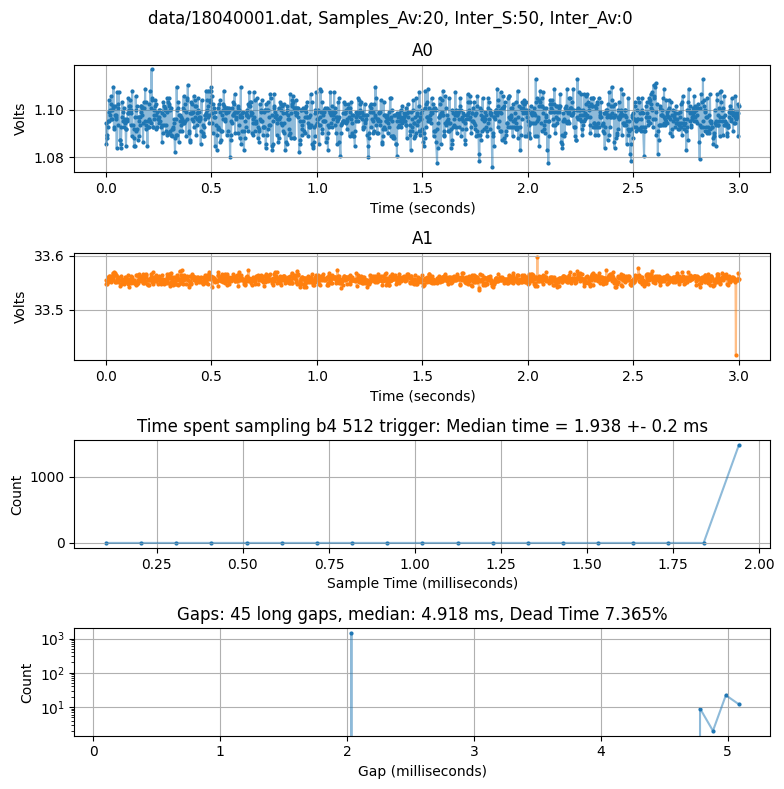

In [3]:
quickLook(paths[file_n], save_png=True)

# Full Test

In [2]:
from binary_IRIS import extract_params, quickLook, analyze
import pandas as pd
import os

''' PULLING FILES FROM A DIR '''
# Define the subdirectory to search within
subdir = "data"
paths = []

# Populate paths with everything in the specified subdirectory
for root, dirs, files in os.walk(os.path.join(os.getcwd(), subdir)):
    for file in files:
        if file.endswith('.dat'):
            path = os.path.join(root, file)
            path = path.replace("\\", "/")  # Replace backslashes with forward slashes
            path = path[-17:]
            paths.append(path)
print(paths)

# directory_path = 'data/M0_tLinear/50_50_4/'



['data/18020003.dat', 'data/18020004.dat', 'data/18020005.dat', 'data/18030001.dat', 'data/18030002.dat', 'data/18030003.dat', 'data/18030004.dat', 'data/18030005.dat', 'data/18040001.dat', 'data/18040002.dat', 'data/18040003.dat', 'data/18040004.dat', 'data/18040005.dat', 'data/18050001.dat', 'data/18050002.dat', 'data/18050003.dat', 'data/18050004.dat', 'data/18050005.dat']


In [3]:
from binary_IRIS import extract_params, quickLook, analyze
import pandas as pd
import os

directory_path = 'data/'
# Initialize an empty list to store dictionaries for each file
all_dictionaries = []
fsls = []
for filename in os.listdir(directory_path):
    # for filename in paths:
    root, extension = os.path.splitext(filename)
    if extension.lower() == ".dat":
        file_path = os.path.join(directory_path, filename)

        # Apply analyze function and get the resulting dictionary
        quickLook(file_path, save_png=False, plot_all=False)
        # first last timing 
        t_1,t_2,_,_,_,_,_ = extract_params(file_path)
        
        result_dict = analyze(file_path,prints=False)
        fsls.append(t_1[0])
        fsls.append(t_2[-1])

        # Add a key-value pair for the filename in the dictionary
        result_dict['Filename'] = filename
        # Move File name to 1st entry
        result_dict = {'Filename': filename, **result_dict}

        # Append the modified dictionary to the list
        all_dictionaries.append(result_dict)

print('Differences between last of one file and first of the next:')
fsls = fsls[1:-1]
for i in range(len(fsls)//2):
    diff = fsls[2*i+1] - fsls[2*i]
    if diff > 0: 
        print(f'{round(diff/1e3,1):,}', 'ms')

# Create a DataFrame directly from the list of dictionaries
# df = pd.DataFrame(all_dictionaries)
df = pd.DataFrame(all_dictionaries).transpose()
df

Differences between last of one file and first of the next:
70.2 ms
75.8 ms
70.1 ms
70.1 ms
70.2 ms
70.3 ms
66.0 ms
66.0 ms
66.4 ms
66.6 ms
65.6 ms
65.5 ms
66.0 ms
65.7 ms


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Filename,18020003.dat,18020004.dat,18020005.dat,18030001.dat,18030002.dat,18030003.dat,18030004.dat,18030005.dat,18040001.dat,18040002.dat,18040003.dat,18040004.dat,18040005.dat,18050001.dat,18050002.dat,18050003.dat,18050004.dat,18050005.dat
PARAMS_us,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
sample_delay,20,20,20,20,20,20,20,20,50,50,50,50,50,50,50,50,50,50
average_delay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
samples_averaged,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
tot_samples,63383,63487,63404,2726,2729,2730,2726,2728,1470,1469,1467,1468,1469,33755,33715,33721,33745,33755
INTRA_us,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
expected_intra,400,400,400,400,400,400,400,400,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
actual_intra,990.0,990.0,990.0,990.0,990.0,990.0,990.0,990.0,1938.0,1938.0,1938.0,1938.0,1938.0,1967.0,1967.0,1967.0,1967.0,1967.0
actual_intra_dt,1004.5,1004.5,1004.5,1004.5,1004.5,1004.5,1004.5,1004.5,1951.5,1951.5,1951.5,1951.5,1951.5,1980.5,1980.5,1980.5,1980.5,1980.5


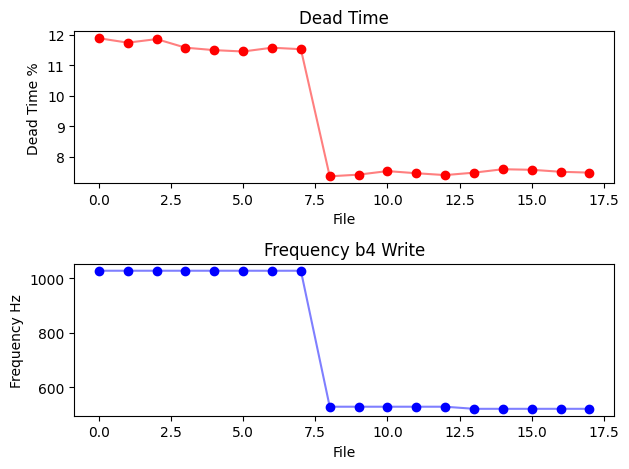

In [4]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(2)

# Plot dead time as scatter plot
ax1.scatter(df.columns, df.loc['dead_time_percent'], color='red')
ax1.plot(df.columns, df.loc['dead_time_percent'], color='red',alpha = 0.5)
ax1.set_title('Dead Time')
ax1.set_xlabel('File')
ax1.set_ylabel('Dead Time %')

# Plot frequency as scatter plot
ax2.scatter(df.columns, df.loc['freq_b4_write'], color='blue')
ax2.plot(df.columns, df.loc['freq_b4_write'], color='blue',alpha = 0.5)
ax2.set_title('Frequency b4 Write')
ax2.set_xlabel('File')
ax2.set_ylabel('Frequency Hz')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()
